<a href="https://colab.research.google.com/github/Rdevrie2/Random-Forest-Example/blob/main/DMAP_SP21_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Keep this code cell here
# Project title will be used by the reviewer
PROJECT_TITLE = "Ryan DeVries' Final Project"
NOTEBOOK_ID   = "https://colab.research.google.com/drive/1iDZFEeRWqlTUHhlF5GJmh_3yxz3VTflD?usp=sharing"
VERSION = "SP21"


---
# A Walk in the Forest: Using a Random Forest Walk to Predict the Minimum Temperature in Champaign, Illinois


<img align="left" src="http://drive.google.com/uc?export=view&id=1X_qshNpgmtJl7ZbVC2uKxlIUOExp-wzX"/>


<!-- this is a comment -->
<!-- 

   VIDEO INSTRUCTIONS (and data hosting)

1. upload to google drive, get the share URL
https://drive.google.com/file/d/1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

2. convert to export URL:
http://drive.google.com/uc?export=download&id=1yGvY5a0KAqnOKf5kLh5EbbbRY4_LonAX

3. OR use some other service to host your video:
https://storage.googleapis.com/uicourse/videos/dmap/Exact%20Instructions%20Challenge%20-%20THIS%20is%20why%20my%20kids%20hate%20me.%20%20Josh%20Darnit.mp4

replace the src="YOUR VIDEO URL" in the <source> tag in the next cell below
-->

# Introduction

The overall goal of this project is to predict the minimum temperature of a certain day in Champaign, Illinois by using old weather data collected from NOAA(National Climatic Data Center), by using a Random Forest Walk.

The idea from this project came from an article I found on towards data science(https://towardsdatascience.com/random-forest-in-python-24d0893d51c0). In which the writer showed how to use a Random Forest Walk to predict the maximum temperature the next day in Seattle, Washington. The article said you could do this for any weather data, and that you could improve your model by including more data! So, I decided why not try and do a similar thing, but this time using data collected from Willard Airport in Champaign, including four years of weather data instead of the one they used in the article(this way I complete the requirement for at least 1000 rows of data), and using trying to predict the minimum instead of the maximum temperature.

So, I am going to build a couple different models. One model will use a subset of the overall dataset, just using data collected during the year 2020. While the other model will use the last 4 years of weather data. Towards the end we can compare both the models and see which one has a higher accuracy. 

When it was announced we would be doing a machine learning project, I wanted to do something involving a Random Forest Walk right away. We didn't learn about it during this class, but I had another class a year or so ago that used R and another program called Waka, to give a really quick example of one. Because I didn't understand it very well, I decided I'd like to give it a try in Python!

# Analysis Introduction

What is a Random Forest Walk? Is probably what you are asking yourself after reading the Introduction section. Wikipedia describes it as follows: "Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees."(https://en.wikipedia.org/wiki/Random_forest). A decision tree is tool that uses a tree-like model of decisions and their possible conseqences. They look like the image below:

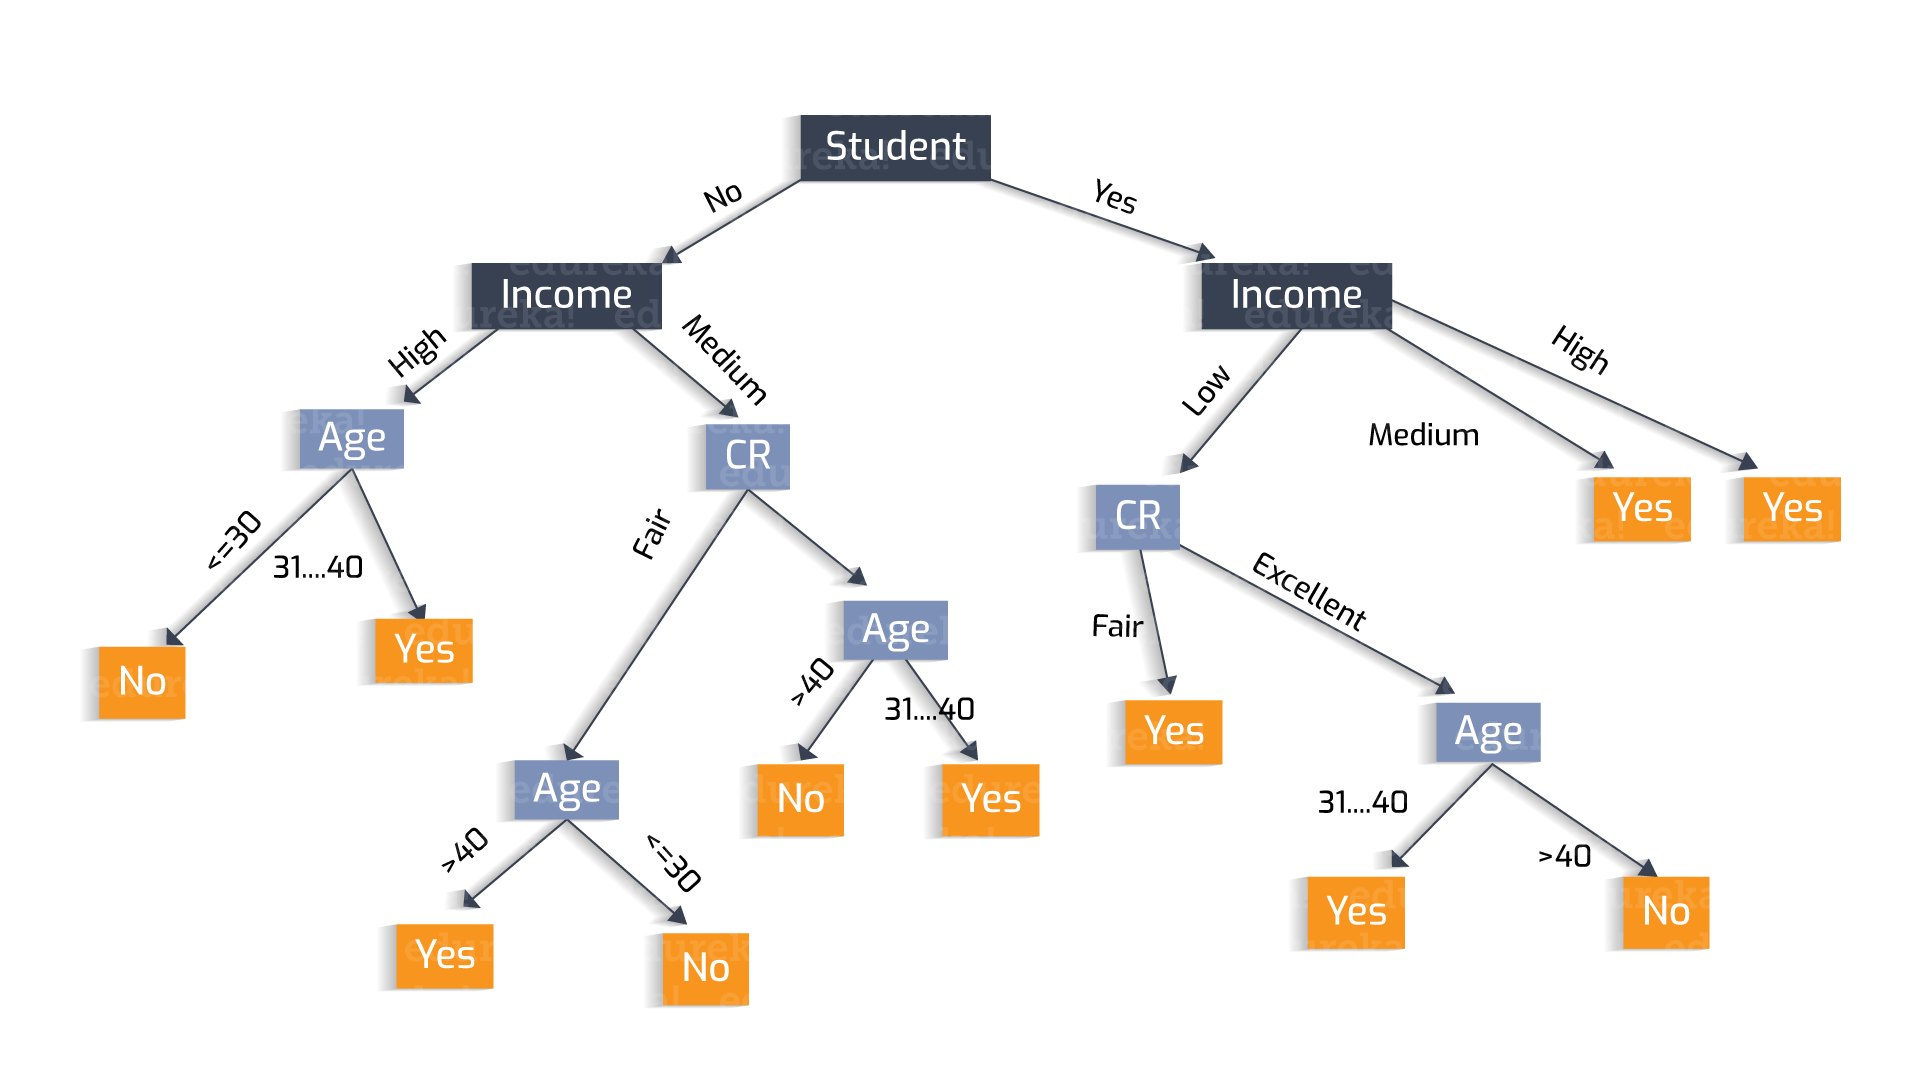



If that Wikipedia definition doesn't make a whole lot of sense to you, let's try a little thought experiment. Let's say you are a character in a video game, and you want to get from the starting town to the next town. To get to the next town you must walk through the woods, and the paths in those woods are not labeled. So, you enter the woods and at every fork in the road you take a left. Eventually, you run into a bear and are killed in one hit. No big deal, you just respawn at the start of the woods and try to walk through it again. This time you take a right at every fork in the road. This eventually leads to you ending up back at the start of the forest. Annoyed you didn't make any progress you then follow the same path as the first time, but instead of taking a left into the bear you take a right instead. This in turn leads you out of the forest and to the next town.

The Random Forest Walk algorithm operates very similarly to what I just described in the previous paragraph. It simulates that walk through the forest x amount of times, and then selects the best performing walk. How does it predict the best performing walk, you might ask? Well, it goes by a type of majority rules. Let's say you run this walk 100 times which in turn creates 100 decision trees. If 80 trees say that all left turns, and then a right turn is the fastest way out of the forest, but 20 trees disagree with that path, the shortest path through the forest is still the one that the 80 trees agreed with, because it is based off the majority.

Would you rather walk randomly around the forest for an hour, or walk through it in five minutes? To me the choice is very obvious. 

Anyway, I will applying this Random Forest Walk method to predict the minimum temperature of Champaign on a given day. By building a couple different models, we can compare the accuracy between them to see which model is better for predicting the minimum temperature. This algorithm is classified as supervised, machine learning.

# Data Acquisition

As stated in the Introduction section, this data was acquired from the National Oceanic and Atmospheric Administration(NOAA). I requested the maximum temperature information for the last four years from the weather station located in Willard Airport in Savoy, Illinois. I also requested the historical average of minimum temperature from the same weather station from 1981-2010 to use in my model.

NOAA actually has a really nice interface to request data from by going to the following website(https://www.ncdc.noaa.gov/cdo-web/). From here you can select to search weather stations or United States locations, daily weather records, climatological data, and even marine data from 1662 through present day. There were also options to look at storm events or severe weather events, but this was not something I explored. Anyway, you just need to search for your locations and have the tool filter to the data to your needs. While learning the website was a little tricky, it doesn't take very long to pick it up and have them email the data right to you.

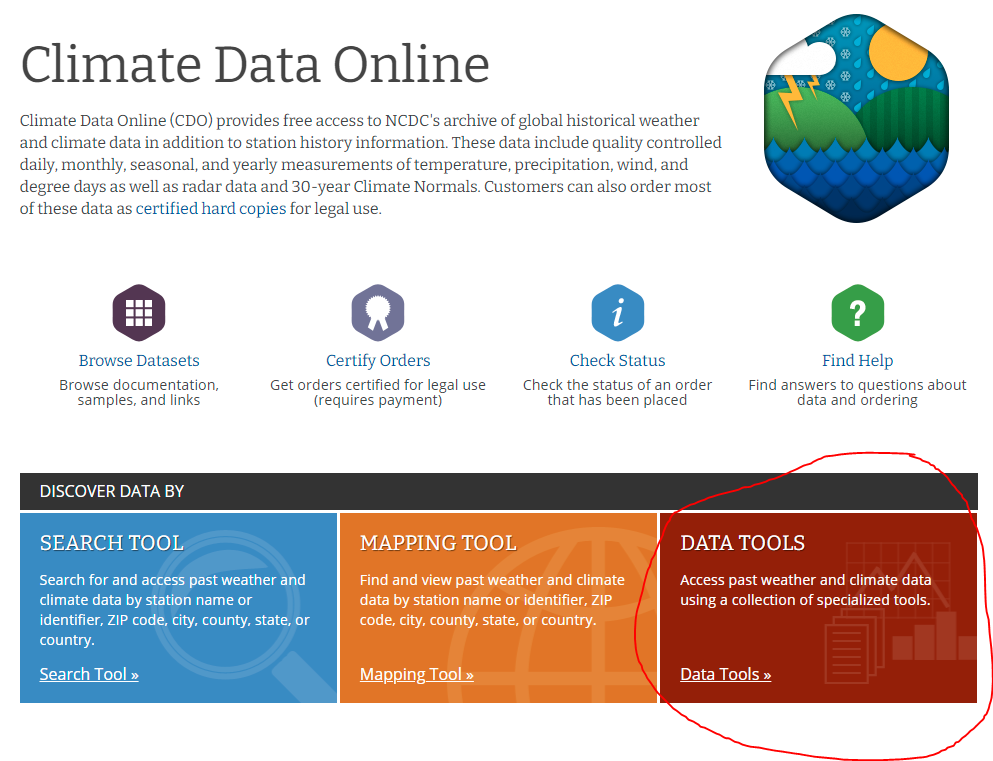

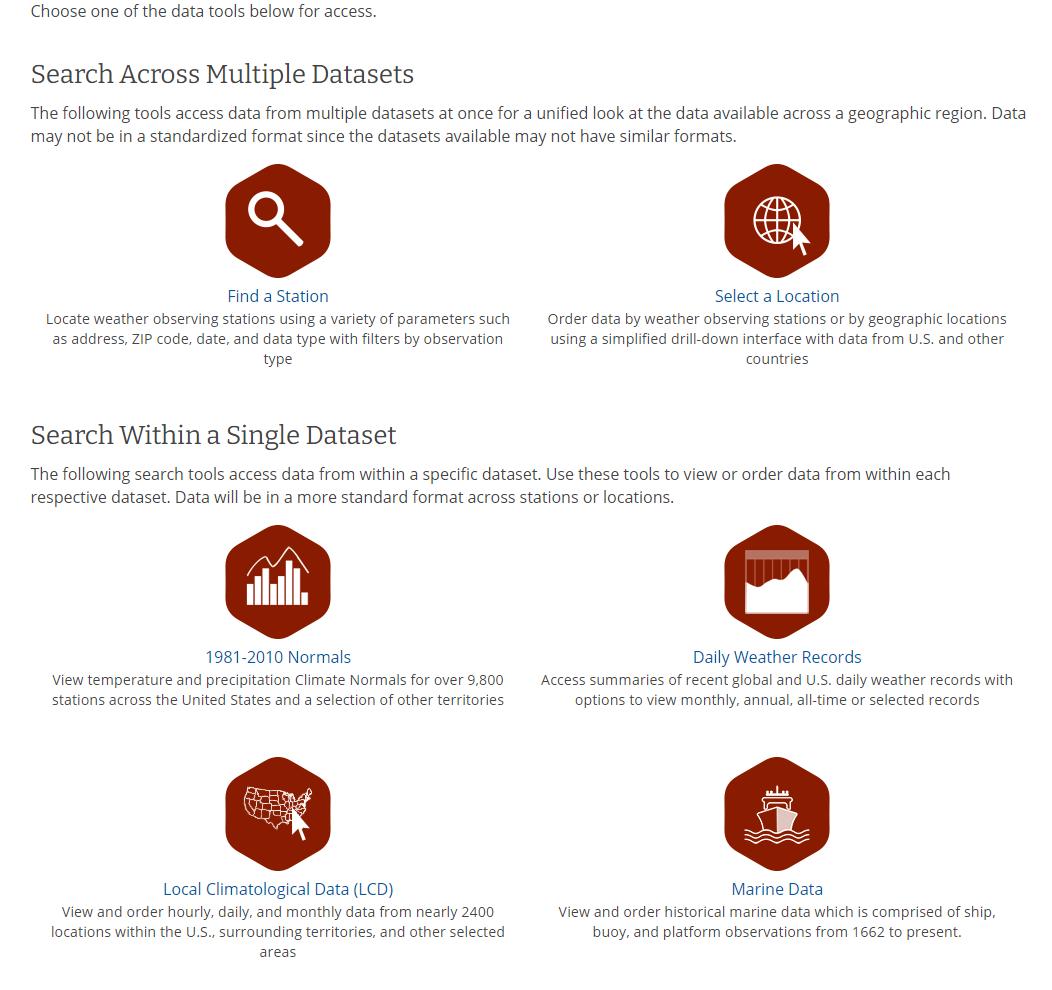

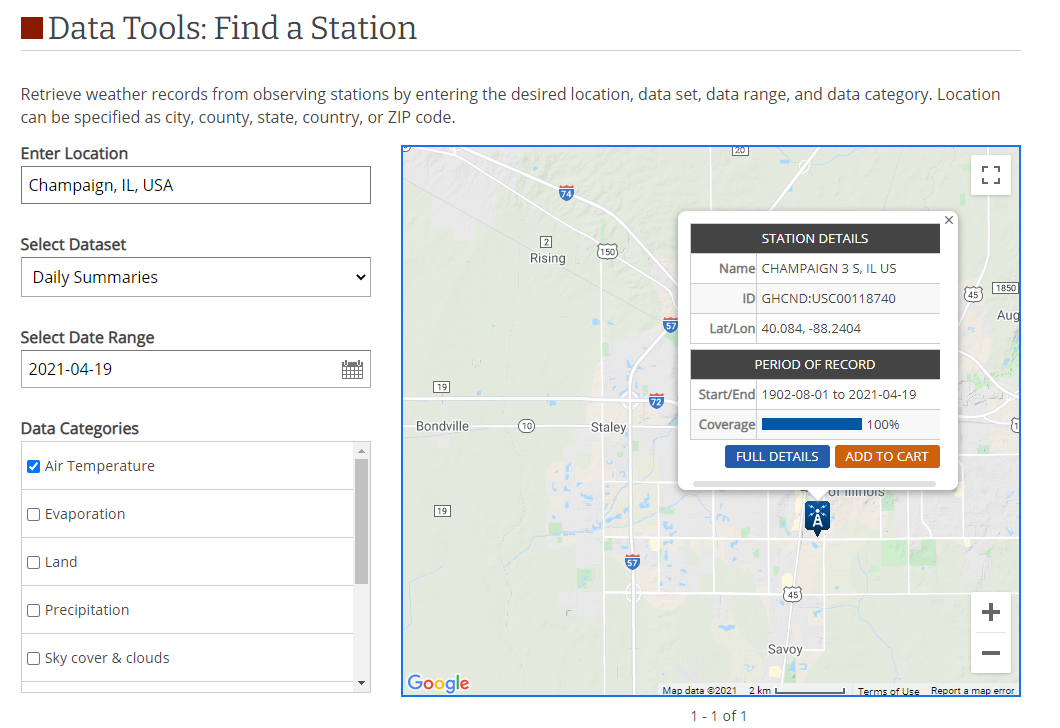

# Data Preparation, Cleaning, and Exploration

Because I requested multiple data files from NOAA, I needed to open them in Excel to combine them together. I needed to combine the Excel files it gave me for the temperatures over the last 4 years, the file for the historical averages, and while I was in there I decided to make some custom columns specific to my analysis. These columns included making columns that have the previous days minimum temperature, adding a categorical variable column for the days of the week, and making a column for random predictions of the weather on that day(which I will use a Python function to fill with data). While I could have done this using Python, it was easier and faster for me to just copy and paste the columns I needed from each of the files into a custom Excel file, that I then exported to a CSV(comma-seperated value) for upload to Google Colab. I also wanted to change some names of my columns so that they make more sense, some of them I needed to read the NOAA website documentation to understand, and break the date column in seperate day, month, and year columns.

While I was in Excel I took a look at the data and found it to be very clean. It seemed to only be missing a couple of temperatures, which could be due to just human error, or if, it's automatically collected, maybe the equipment that collects the data was down for a few days. Overall, it was much cleaner and complete than some of the other weather station data I considered, which might be due to the weather station being part of an airport. I would have to imagine that an airport would need to be on top of the weather report everyday, given how much the weather can impact flights.

At first I was actually happy that there is a little bit of missing data out of my dataset because I wanted to put what I learned in the Data Cleaning lessons earlier in this class to use. However, I realized that it messed with Excel sheet formulas when I had missing values. So, I instead decided to fill in my missing data with the average minimum temperature from that month in Excel. I would have prefered to do it in Python, but using Excel for five minutes was preferable to having to write many different for loops to fill in my other created columns.

In [ ]:
# add your imports here for your entire project
import pandas as pd
import numpy as np
import random
import pydot
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import ensemble
from sklearn import tree

In [ ]:
#this function imports the data from my Google Drive into a pandas dataframe
def install_data():
  !gdown 'https://drive.google.com/uc?export=download&id=13qpfuLqIHtGLi8BwodJEciLCCK7tggdC'
  df = pd.read_csv('Champaign Weather Data Min.csv',sep=',')
  return df

#save the data to a variable for later use
data = install_data()

#show a preview of the data to the view
data

Downloading...
From: https://drive.google.com/uc?export=download&id=13qpfuLqIHtGLi8BwodJEciLCCK7tggdC
To: /content/Champaign Weather Data Min.csv
100% 108k/108k [00:00<00:00, 28.8MB/s]


STATION                  NAME  ...  Historical_min_temp  Random_predict
0     USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.2             NaN
1     USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.1             NaN
2     USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.0             NaN
3     USC00118740  CHAMPAIGN 3 S, IL US  ...                 17.8             NaN
4     USC00118740  CHAMPAIGN 3 S, IL US  ...                 17.7             NaN
...           ...                   ...  ...                  ...             ...
1456  USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.9             NaN
1457  USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.8             NaN
1458  USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.6             NaN
1459  USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.5             NaN
1460  USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.3             NaN

[1461 rows x 14 columns]

Above you can see the final, cleaned dataframe imported into pandas. Below I will leave a key as to what each of the columns mean:



*   **Station**: NOAA station number where data was collected
*   **Name**: Name of the station
*   **Month**: Month of the year as a number
*   **Day**: Day of the month as a number
*   **Year**: Year the data was collected
*   **Weekday**: Categorical variable showing what day of the week corresponds to each date
*   **Actual_min_temp**: The minimum temperature collected on that day
*   **Temp_1_prior**: The minimum temperature collected one day prior
*   **Temp_2_prior**: The minimum temperature collected two days prior
*   **Temp_3_prior**: The minimum temperature collected three days prior
*   **Temp_4_prior**: The minimum temperature collected four days prior
*   **Temp_5_prior**: The minimum temperature collected five days prior
*   **Historical_min_temp**: The average of all minimum temperatures collected on that day from 1981-2010
*   **Random_predict**: Actual_min_temp plus or minus a number between 0-15, this simulates someone guessing the weather





As you can see from the preview of the data, the Random_predict column is full of NaN values. This column is meant to simulate someone guessing what the weather will be like on that day. Let's fill in that column now.

In [ ]:
#create a function that fills in the Random_predict column
def random_predict(df):
  #assign our actual_min_temp column to a numpy array
  min_temp = np.array(df['Actual_min_temp'])

  #initialize a counter through the array
  count = 0

  #use a random seed so this is reproducible, you can always change this if you want, it will just give you different numbers in the Random_predict column
  random.seed(5)

  #create a for loop to move through the numpy array
  #after every step increment the counter
  for x in min_temp:
    min_temp[count] = x + random.randint(-15,15)
    count +=1
  
  #put numpy array into our dataframe
  df['Random_predict'] = min_temp

  #return the new dataframe
  return df

#set our dataframe equal to the new dataframe
data = random_predict(data)

#preview the new dataframe
data

STATION                  NAME  ...  Historical_min_temp  Random_predict
0     USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.2              23
1     USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.1              26
2     USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.0              29
3     USC00118740  CHAMPAIGN 3 S, IL US  ...                 17.8               9
4     USC00118740  CHAMPAIGN 3 S, IL US  ...                 17.7              17
...           ...                   ...  ...                  ...             ...
1456  USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.9              18
1457  USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.8              25
1458  USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.6              21
1459  USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.5              29
1460  USC00118740  CHAMPAIGN 3 S, IL US  ...                 18.3              24

[1461 rows x 14 columns]

Great! As you can see the Random_predict column now has data in it. Now that we have a dataset that doesn't have any NaN values there are a few steps we need to take before we can start the Random Forest Walk Analysis. These steps are as follows:


*   Drop information columns we don't need from the dataset
*   One-hot encode the categorical variable(Weekday)
*   Take a subset of the data for the one year model
*   Split the dataframe into targets and features(for both the subset and full dataset)
*   Split the data into training and testing datasets(for both the subset and full dataset)

While this may seem like a decent amount of work to do, it is really not that bad and can be done in just a few lines of Python code!


First, let's go ahead on drop some two columns we don't need: Station and Name. They aren't really useful to our analysis and they all say the same thing because all of this data was collected from the same station. Also, we would like to OneHotEncode this dataframe, and don't want these categorical variables to be in it. We just want to do it to the Weekday column. 

In [ ]:
#drop the station column from the dataset
data = data.drop('STATION', axis=1)

#drop the name column from the dataset
data = data.drop('NAME',axis=1)

#preview the new dataframe
data

Month  Day  Year  ... Temp_5_prior  Historical_min_temp  Random_predict
0         1    1  2017  ...           19                 18.2              23
1         1    2  2017  ...           33                 18.1              26
2         1    3  2017  ...           21                 18.0              29
3         1    4  2017  ...           13                 17.8               9
4         1    5  2017  ...            7                 17.7              17
...     ...  ...   ...  ...          ...                  ...             ...
1456     12   27  2020  ...           27                 18.9              18
1457     12   28  2020  ...           25                 18.8              25
1458     12   29  2020  ...           10                 18.6              21
1459     12   30  2020  ...            6                 18.5              29
1460     12   31  2020  ...           16                 18.3              24

[1461 rows x 12 columns]

Next, let's go ahead and OneHotEncode our Weekday column. One hot encoding assigns a 0 or 1 to an attribute if that attribute is present or not. After we do this, the Weekdays column should be split into all the days of the week, should only have a single 1 per row to show what day of the week it is.

In [ ]:
#a function to one hot encode the weekdays column
def one_hot_encode(df):

  #assign a varible to our OneHotEncoder
  onehot = sk.preprocessing.OneHotEncoder(dtype=np.int,sparse=True)

  #assign a reshaped Weekday column to a variable
  values = df['Weekday'].values.reshape(-1,1)

  #fit and transform the data
  values = onehot.fit_transform(values).toarray()
  labels = onehot.categories_

  #return a new dataframe with the new categories
  return pd.DataFrame(values,columns=labels)

#assign our new dataframe to a variable
onehotencoded = one_hot_encode(data)

#combine our frames together into a single dataframe
frames = [data,onehotencoded]
data = pd.concat(frames,axis=1)

#drop our Weekday column now that we have it OneHotEncoded
data = data.drop('Weekday',axis=1)

#save a copy of this dataset for later if we need it
data_copy = data

#preview the new dataframe
data




Month  Day  Year  Actual_min_temp  ...  (Sun,)  (Thu,)  (Tue,)  (Wed,)
0         1    1  2017               19  ...       1       0       0       0
1         1    2  2017               33  ...       0       0       0       0
2         1    3  2017               21  ...       0       0       1       0
3         1    4  2017               13  ...       0       0       0       1
4         1    5  2017                7  ...       0       1       0       0
...     ...  ...   ...              ...  ...     ...     ...     ...     ...
1456     12   27  2020               24  ...       1       0       0       0
1457     12   28  2020               22  ...       0       0       0       0
1458     12   29  2020               19  ...       0       0       1       0
1459     12   30  2020               25  ...       0       0       0       1
1460     12   31  2020               21  ...       0       1       0       0

[1461 rows x 18 columns]

Now, because we want to build multiple models and compare them. We need to just take the first year's worth of weather data. Let's do that now.

In [ ]:
# a function to split the dataset into a the first one year worth of data(365 days)
def make_subset(data):
  #take the first year's worth of data
  subset_data = data.head(365)

  #remove some other columns from the subset to make the models a little different
  subset_data = subset_data.drop('Temp_5_prior',axis=1)
  subset_data = subset_data.drop('Temp_4_prior',axis=1)

  #return the new dataset
  return subset_data

#assign our new data to a variable
subset_data = make_subset(data)

#save a copy in case we need it later
subset_data_copy = subset_data

#preview our subset_data to make sure its the first year
subset_data



Month  Day  Year  Actual_min_temp  ...  (Sun,)  (Thu,)  (Tue,)  (Wed,)
0        1    1  2017               19  ...       1       0       0       0
1        1    2  2017               33  ...       0       0       0       0
2        1    3  2017               21  ...       0       0       1       0
3        1    4  2017               13  ...       0       0       0       1
4        1    5  2017                7  ...       0       1       0       0
..     ...  ...   ...              ...  ...     ...     ...     ...     ...
360     12   27  2017               -4  ...       0       0       0       1
361     12   28  2017                1  ...       0       1       0       0
362     12   29  2017               13  ...       0       0       0       0
363     12   30  2017               -1  ...       0       0       0       0
364     12   31  2017               -5  ...       1       0       0       0

[365 rows x 16 columns]

Great! Now we need to use both our original dataframe and our subset to create features and targets. The target is what we want our model to predict, while the features are the columns that will be used to make that prediction. We can do that with the following code.

In [ ]:
# a function to process the data into numpy arrays, extract the targets, and save column names
def get_targets(data,subset_data, remove):
  #create numpy arrays of the targets for the subset and full dataset
  targets = np.array(data['Actual_min_temp'])
  targets_subset = np.array(subset_data['Actual_min_temp'])

  if remove is True:
    #remove the targets from the dataframes if remove is true
    data = data.drop('Actual_min_temp',axis=1)
    subset_data = subset_data.drop('Actual_min_temp',axis=1)

  #save the names of the columns as a variable in case we need them later
  column_names = list(data.columns)

  #change the datasets into numpy arrays to be feed into the sklearn training and testing sets
  data_array = np.array(data)
  subset_data_array = np.array(subset_data)

  #return all the variables
  return targets,targets_subset,data,subset_data,column_names,data_array,subset_data_array

#assign our returned values to variables for later use
targets,targets_subset,data,subset_data,column_names,data_array,subset_data_array = get_targets(data,subset_data,True)

The last thing we need to do is split our new numpy arrays into training and testing datasets. Sklearn has a way we can do this really easily! Though we will need to set the random_set parameter so the results are reproducible. Otherwise you'd get different training and testing sets everytime you run the following code:

In [ ]:
# a function to split data into training and testing sets
def training_and_testing_split(data,targets):
  train_features,test_features,train_targets,test_targets = sk.model_selection.train_test_split(data,targets,test_size = 0.25, random_state = 5)
  return train_features,test_features,train_targets,test_targets

#Split the data into training and testing sets for one years worth of data
train_features_subset, test_features_subset, train_targets_subset,test_targets_subset = training_and_testing_split(subset_data_array,targets_subset)

#Split the data into training and testing sets for the full 4 year dataset
train_features, test_features, train_targets,test_targets = training_and_testing_split(data_array,targets)



In [ ]:
#we can now check if this worked correctly by looking at the shape of our newly created variables
#We should expect the number of columns and rows to match between the training and testing sets
#We also expect the labels to match in terms of columns and rows, so let's check
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_targets.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_targets.shape)

Training Features Shape: (1095, 17)
Training Labels Shape: (1095,)
Testing Features Shape: (366, 17)
Testing Labels Shape: (366,)


Looks like our full dataset seems to be working correctly! Let's check the subset as well.

In [ ]:
print('Training Features Shape:', train_features_subset.shape)
print('Training Labels Shape:', train_targets_subset.shape)
print('Testing Features Shape:', test_features_subset.shape)
print('Testing Labels Shape:', test_targets_subset.shape)

Training Features Shape: (273, 15)
Training Labels Shape: (273,)
Testing Features Shape: (92, 15)
Testing Labels Shape: (92,)


This also works correctly! With all of that done, we are ready to start our machine learning models!

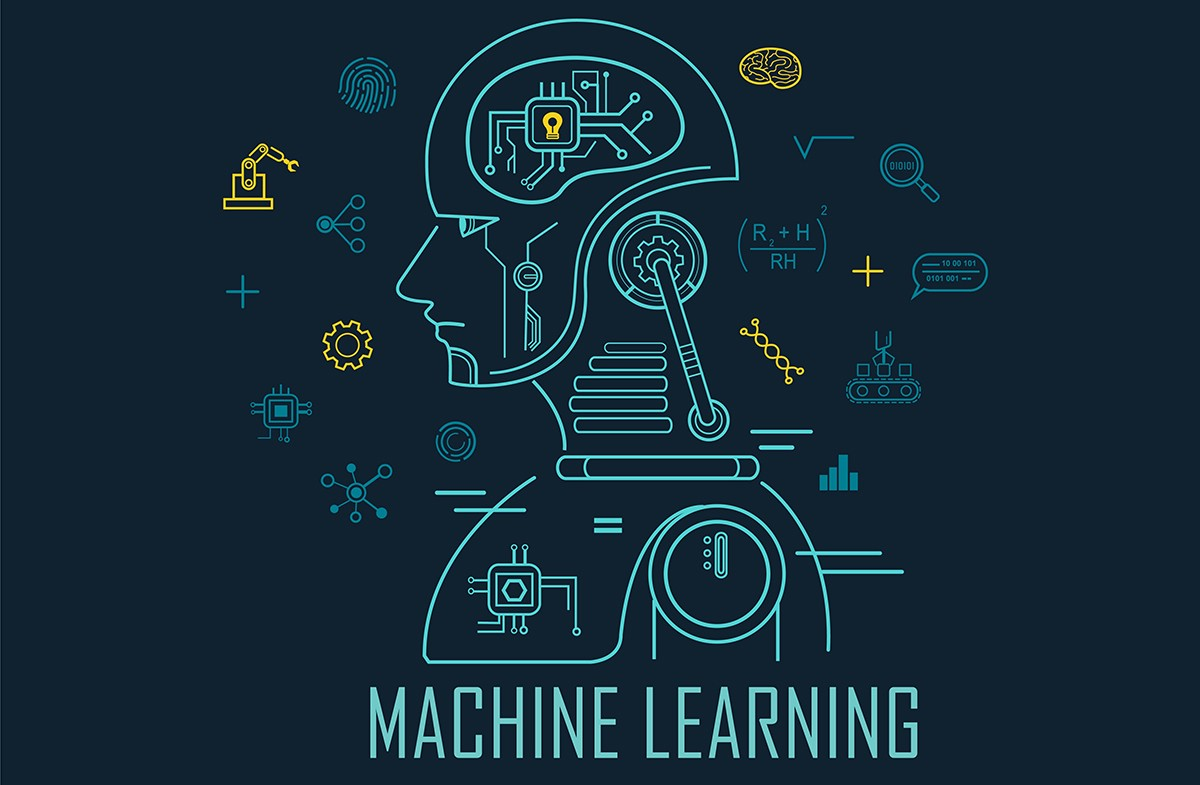

# Data Analysis

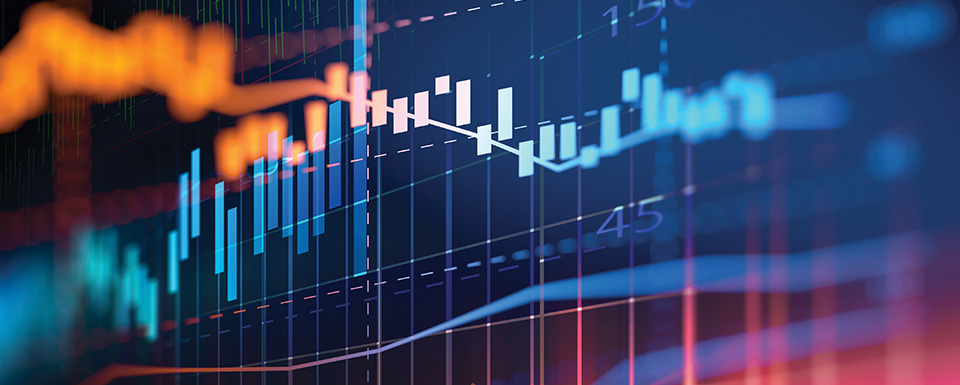

# Model 1: A Single Years Worth of Minimum Temperatures

Now that our data has been put into the format that the model will like, it's time to actually do some machine learning!

However, the first thing we need to do is establish a baseline. A baseline is measure we are trying to beat when we build our model and test our predictions. It helps evaluate if our model is worth using for our particular problem. Luckily for us, we have the historical min temperatures for each day of the year, so let's use that as our baseline.

In [ ]:
def get_baseline(test_features,test_targets,index):
  #Use the historical minimum averages as our baseline
  baseline_prediction = test_features[:,index]

  #Calculate the baseline error
  baseline_error = abs(baseline_prediction - test_targets)

  #Use numpy to get the mean of this array
  average_baseline_error = np.mean(baseline_error)

  #Print out the average baseline error
  print('The average baseline error is:', average_baseline_error)

#run the function
#I removed Temp_4_prior and Temp_5_prior from our subset so the index we need is 6
get_baseline(test_features_subset,test_targets_subset,6)

The average baseline error is: 7.089130434782608


Great! So if our model can't beat our average error of ~7 degrees then we might need to choose a different machine learning model, play with some hyperparameters, or aquire more data.

Anyway, we are now ready to train, and test our first model! Let's make a function to do that.

In [ ]:
#this is a function to train and test our model, it prints out MSE and accuracy
#it also returns the model
def train_and_test(train_features,train_targets,test_features,test_targets):

  #Create a model with 1000 decision trees
  random_forest = sk.ensemble.RandomForestRegressor(n_estimators=1000,random_state=5)

  #Train that model using data inputted by the user
  random_forest.fit(train_features,train_targets)

  #Use the predict method to test the data 
  predicted = random_forest.predict(test_features)

  #Calculate the errors as we did before
  error = abs(predicted - test_targets)

  #Print out the MSE(Mean Squared Error)
  print('Our MSE is:', np.mean(error))

  #Calculate MAPE(mean absolute percentage error)
  mape = 100 * (error/test_targets)

  #Calculate accuracy
  #Use absolute value because the mean MAPE is negative
  accuracy = 100 - abs(np.mean(mape))

  #Display how accurate our model is
  print('Accuracy:',accuracy,'%')

  #return the random forest
  return random_forest
  
random_forest_subset = train_and_test(train_features_subset,train_targets_subset,test_features_subset,test_targets_subset)

Our MSE is: 4.578250000000001
Accuracy: 93.79231221247879 %


So our baseline was ~7, while our MSE ends up being 4.58. This seems pretty good! We managed to improve on our baseline by having less error than the baseline. We also have found that our model can accurately predict the minimum temperature in Champaign about 93.8 % of the time.

Let's write some code to visualize how to the random forest works. The follow code creates a picture of a single decision tree in the random forest. After you run the code you should find it appear in the files section on the sidebar. I will be posting the picture below the code as well.

In [ ]:
#make a copy of column_names with Temp Prior 5 and 4 missing
column_names_subset = column_names[:]
column_names_subset.remove('Temp_4_prior')
column_names_subset.remove('Temp_5_prior')

In [ ]:
#creates a graph of one of the forest's trees
def get_tree(random_forest,target_names):

  #pull out a tree from the random forest
  tree_1 = random_forest.estimators_[1]

  #export the tree as a dot file
  sk.tree.export_graphviz(tree_1,out_file='tree_1.dot',feature_names=target_names,rounded=True,precision=1)

  #use that file to make a graph
  (graph, ) = pydot.graph_from_dot_file('tree_1.dot')

  #Write the graph out as an image
  graph.write_png('tree_1.png')

get_tree(random_forest_subset,column_names_subset)

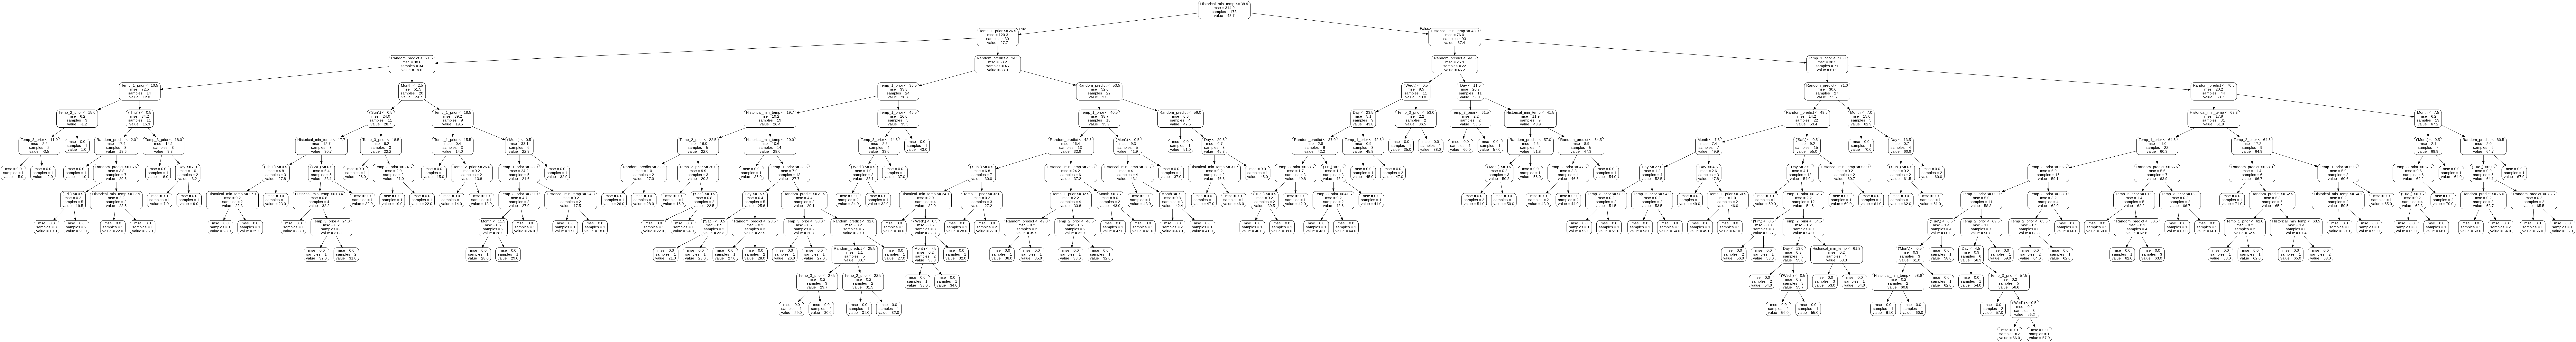

As you can see, we end up with this giant decision tree that is pretty difficult to read(the code actually saves this tree to a file you can download, I've just uploaded it here so you can see it). Let's re-create the random forest but this time using less trees(estimators) and limiting the max_depth.

In [ ]:
#makes a tree limited to 3 levels of depth
def small_tree(train_features,train_targets,target_names,tree_num):

  #re-run the random forest creation setting tree depth to 3 levels
  random_forest_small = sk.ensemble.RandomForestRegressor(n_estimators=20,max_depth=3)
  random_forest_small.fit(train_features,train_targets)

  #extract one of the trees
  small_tree = random_forest_small.estimators_[tree_num]

  #save the tree to a png
  sk.tree.export_graphviz(small_tree,out_file='small_tree_1.dot',feature_names=target_names,rounded=True,precision=1)
  (graph, ) = pydot.graph_from_dot_file('small_tree_1.dot')
  graph.write_png('Limited_depth_tree.png')

small_tree(train_features_subset,train_targets_subset,column_names_subset,1)

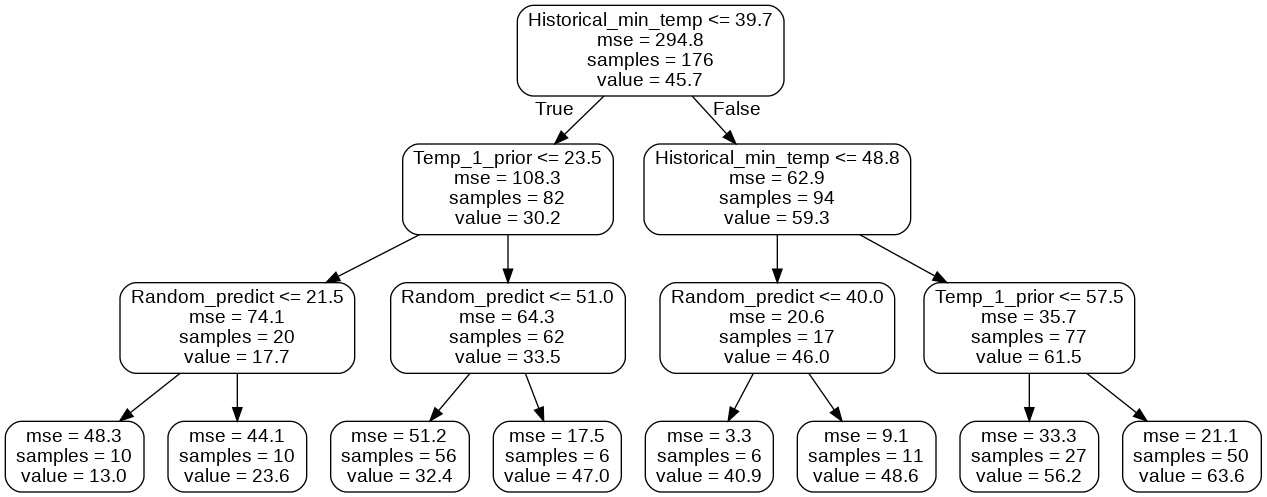

Ok we this seems much easier to understand than our other much larger tree. As you can see you start from the top node and move downward from that node based on a condition. So, the first node checks if the historical min temp on a certain day is less than 39.7 Fahrenheit, then you just follow the path on the left if that's true, or to the right if that condition is false(all left arrows are true, while right arrows are false). Anyway, you just follow the path until the tree spits out a value. 

For example, let's say you have a day where Historical_min_temp is less than 39.7, Temp_1_prior is less than 23.5, and the Random_predict for that day is less than 21.5. From that information our random forest predicts the minimum temperature on that day to be 13(all of these values are in degrees Fahrenheit). 

It's also interesting to note that our tree only uses 3 variables to make a prediction and not all of our data. We can actually write some code to determine how important each of the variables we used are! We will also go ahead on create a quick plot of the output.

('Temp_1_prior', 0.6330721131512711)
('Historical_min_temp', 0.18068896048603628)
('Random_predict', 0.13826778398509337)
('Temp_2_prior', 0.013480215758855786)
('Temp_3_prior', 0.010538058891296663)
('Day', 0.009990988975350692)
('Month', 0.004148774684413858)
(('Sun',), 0.0019723703623603156)
(('Sat',), 0.0019051792254877178)
(('Fri',), 0.001689452606304369)
(('Thu',), 0.001368020639788555)
(('Wed',), 0.001146222700198207)
(('Mon',), 0.0009446417792234973)
(('Tue',), 0.0007872167543197436)
('Year', 0.0)


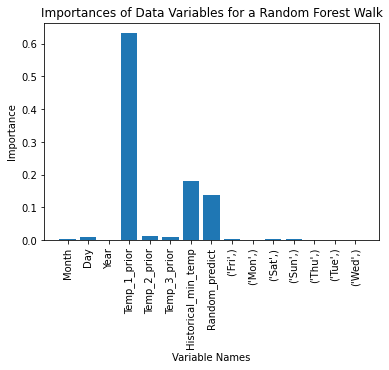

In [ ]:
def variable_importance(data_array,random_forest,column_names):

  #get of list of important variables
  importance = list(random_forest.feature_importances_)

  #make of list of tuples with the variables and their importances
  importances_list = [(data_array, importance) for data_array,importance in zip(column_names,importance)]

  #sort the importances by most important
  data_importances = sorted(importances_list, key = lambda x: x[1], reverse = True)

  #print out our list
  for x in data_importances:
    print(x)
  
  #make a list of the variables for the x axis
  x_axis = list(range(len(importance)))

  #make a barchart
  plt.bar(x_axis,importance)
  
  #add the variable names to the x axis
  plt.xticks(x_axis,column_names,rotation='vertical')

  #label the x and y axis, plus give it a title
  plt.xlabel('Variable Names')
  plt.ylabel('Importance')
  plt.title('Importances of Data Variables for a Random Forest Walk')

variable_importance(subset_data,random_forest_subset,column_names_subset)

This prints out a list of tuples where we can see the variable name on the left, and the importance that variable has on our analysis on the right(they should add up to 1). As we can see from the printed output, our most important variable to predict the minimum temperature is the minimum temperature from the day before. The other 2 important variables are the historical minimum temperature and interestly, our randomly predicted column. I bet if I had made the range in the random predict column larger that it would have had a lesser importance, but hey pretty interesting!

If we were to re-run the random forest model using just Temp_1_prior, Historical_min_temp, and Random_predict, our model would still be pretty accurate as the other variables are just not that useful for determining the minimum temperature on a certain day.

# Model 2: The Last Four Years Worth of Weather Data

Now that we have ran through our model with just a single year's worth of data, let's see if we can improve our model by including more data! Luckily, we don't need to write very much code at all to this because we set up our code blocks as functions in the previous model. Let's create our second model now by running through our pipeline.

First, we grab our baseline again as our dataset has already been cleaned for us in the data prep section.

In [ ]:
#our index is different because our original dataset had more variables
#this is still the historical minimum temp column
get_baseline(test_features,test_targets,8)

The average baseline error is: 6.7636612021857925


Our baseline is 6.76, so somewhat similar to the ~7 we had before, though it seems including more data reduced our baseline error. Let's continue down the pipeline.

In [ ]:
random_forest = train_and_test(train_features,train_targets,test_features,test_targets)

Our MSE is: 3.7605464480874313
Accuracy: 81.09950017936744 %


Our MSE is lower in this model than the model with a lesser amount of data, but our Accuracy has decrease from ~94% to ~81%. This seems a little strange to me, as I would have expect having more data would decrease our MSE and increase our accuracy. Let's continue onward.

In [ ]:
get_tree(random_forest,column_names)

tree_1.png

As you can see, when we pull out a tree from our bigger dataset, it is even more hard to read than our one year model.

In [ ]:
small_tree(train_features,train_targets,column_names,1)

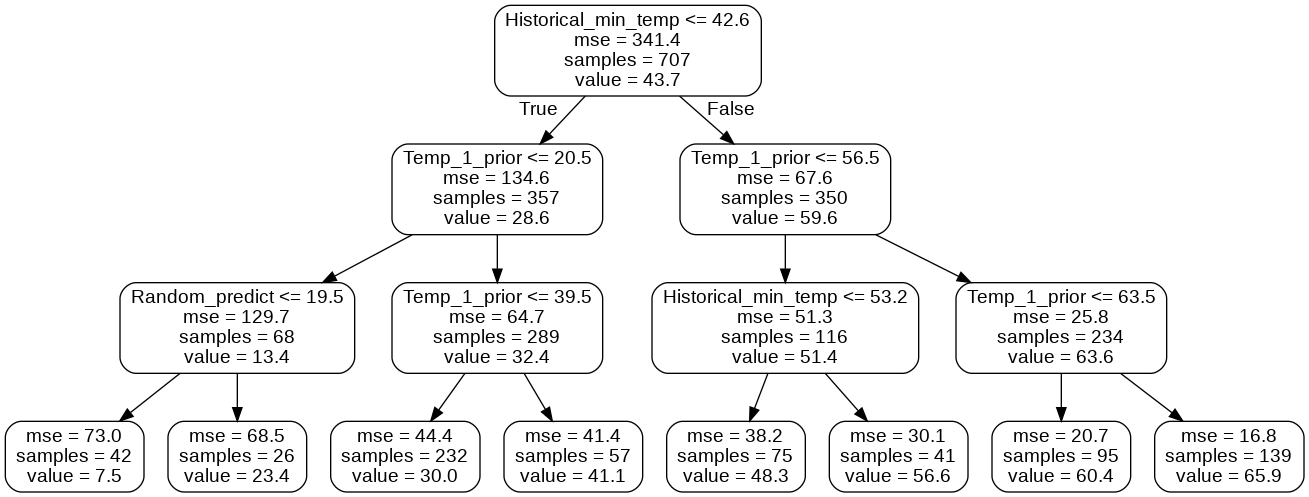

('Temp_1_prior', 0.7811187495292538)
('Random_predict', 0.11081186727483723)
('Historical_min_temp', 0.058371486055764484)
('Day', 0.008526430444358291)
('Temp_4_prior', 0.008114321885008793)
('Temp_2_prior', 0.007822472877016337)
('Temp_5_prior', 0.006673465959821495)
('Temp_3_prior', 0.006259160762466388)
('Year', 0.0029736365378436906)
('Month', 0.0028515432521083253)
(('Thu',), 0.0013040563704861804)
(('Sun',), 0.0011757425229829233)
(('Mon',), 0.0009643952073618269)
(('Fri',), 0.0008989956022583437)
(('Wed',), 0.0008080373187172662)
(('Sat',), 0.000756740944101759)
(('Tue',), 0.0005688974556128532)


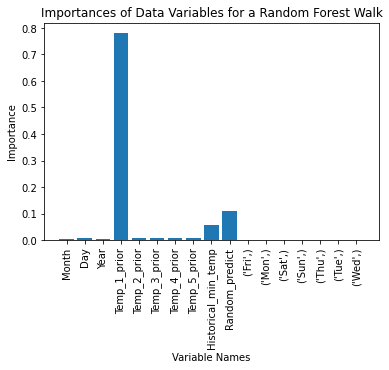

In [ ]:
variable_importance(data_array,random_forest,column_names)

As we can see, the temperature 1 day prior is still the most useful variable in predicting the weather for a certain day, followed by this time Random_predict and Historical_mean_temp.

As stated before, I would expect our model with more data to be the more accurate model. However, this is not the case. Given that I would like to use the model with a lower MSE and a higher accuracy, let's try building model 2 again, but this time we can use a feature of sklearn to find the best hyperparameters to increase accuracy. 

# Model 3: Model 2 but with hyperparameter tuning

A hyperparameter is a parameter that you enter into to the machine learning model to control the learning process. So, in our case it would be what goes in the parentheses of RandomForestRegressor, which we used in a function earlier.

While we could just try randomly guessing as to what parameters are best for our dataset, a much faster way is to use sklearn's RandomizedSearchCV. This will just randomly select combinations of hyperparameters that we will define, check them against the training data, and then return the values that do the best.

Let's write this code as a function now.

In [ ]:
#a function to find the hyper parameters of an inputed model:
def tune_hyper_parameters(model,features,targets):

  #create a hyperparameter grid as a dictionary
  param_grid = {
    'n_estimators': np.linspace(10, 250).astype(int),
    'max_depth': [None] + list(np.linspace(3, 25).astype(int)),
    'max_features': ['auto', 'sqrt', 'log2', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 60, 500).astype(int)),
    'min_samples_split': [3, 6, 12],
    'bootstrap': [True, False]
  }

  #create the random searching model
  random_search = sk.model_selection.RandomizedSearchCV(model,param_grid,n_jobs=-1,
                                                        scoring='neg_mean_absolute_error',
                                                        n_iter = 20,
                                                        verbose = 2,
                                                        random_state = 5
  )

  #fit the random search to the training set
  random_search.fit(features,targets)

  #print out the best parameters for our full dataset
  print(random_search.best_params_)


In [ ]:
#Use the function to see our best hyperparameters
tune_hyper_parameters(random_forest,train_features,train_targets)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.0s finished


{'n_estimators': 191, 'min_samples_split': 6, 'max_leaf_nodes': 34, 'max_features': 'auto', 'max_depth': 13, 'bootstrap': True}


Ok awesome! We now have hyper parameters that unique to our large dataset. Now, you can change how the param_grid dictionary is set up if you would like. You could add more estimators or change the np.linspace for max depth to include more/less, or change the min_samples_split array. This just calculates the best parameters given what you put into the dictionary and the dictionary is what I came up with after looking up how to use RandomizedSearchCV online.

So, we could actually get more fine tuned hyperparameters, but this method is much, much faster than you trying to hand input these parameters then run the model and check the accuracy everytime.

Anyway our best hyperparameters are as follows:


*   **n_estimators: 191**
*   **min_samples_split: 6**
*   **max_leaf_nodes: 34**
*   **max_features: 'auto'**
*   **max_depth: 13**
*   **bootstrap: True**

Let's re-write the function that creates our Random Forest Model, but add in these hyperparameters.

In [ ]:
def train_test_with_hyperparameters(train_features,train_targets,test_features,test_targets,
                              n_estimators,min_samples_split,max_leaf_nodes,
                              max_features,max_depth,bootstrap):

  #Create a model with our best hyperparameters
  random_forest = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators,min_samples_split = min_samples_split,
                                                    max_leaf_nodes = max_leaf_nodes,
                                                    max_features = max_features,
                                                    max_depth = max_depth,
                                                    bootstrap = bootstrap,random_state=5)

  #Train that model using data inputted by the user
  random_forest.fit(train_features,train_targets)

  #Use the predict method to test the data 
  predicted = random_forest.predict(test_features)

  #Calculate the errors as we did before
  error = abs(predicted - test_targets)

  #Print out the MSE(Mean Absolute Error)
  print('Our MSE is:', np.mean(error))

  #Calculate MAPE(mean absolute percentage error)
  mape = 100 * (error/test_targets)

  #Calculate accuracy
  #Use absolute value because the mean MAPE is negative
  accuracy = 100 - abs(np.mean(mape))

  #Display how accurate our model is
  print('Accuracy:',accuracy,'%')

  #return the random forest
  return random_forest

In [ ]:
best_random_forest = train_test_with_hyperparameters(train_features,train_targets,
                                                     test_features,test_targets,191,6,34,'auto',13,True)

Our MSE is: 3.8358022204879316
Accuracy: 81.41046890165948 %


Hmm, using this did not improve our model by very much. We did increase our accuracy a little bit to ~81.4% but it's still not as high as our dataset using just one year. Perhaps the reason for that is due to having extra features in this model compared to the year's data model. Let's try and drop all the features that weren't very useful for prediction from both of the copies of the datasets we saved in the data preparation(ie. just use Temp_1_prior, Random_predict, and Historical_min_temp). Just as a last ditch effort in improving our model using the full dataset.

# Model 4: Removing Variables

The average baseline error is: 6.7636612021857925
Our MSE is: 3.996842818110851
Accuracy: 81.41139248569971 %
('Temp_1_prior', 0.7929178873334984)
('Random_predict', 0.12656870966530548)
('Historical_min_temp', 0.0805134030011961)


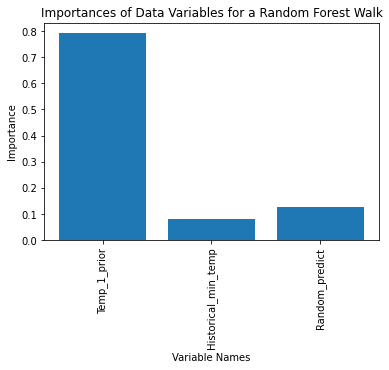

In [ ]:
#drop the columns I dropped from the smaller dataset earlier
data_copy = data_copy.drop('Temp_5_prior',axis=1)
data_copy = data_copy.drop('Temp_4_prior',axis=1)

#drop all but the columns that are useful for prediction in both copies of the datsets
data_copy = data_copy.drop('Day',axis=1)
data_copy = data_copy.drop('Month',axis=1)
data_copy = data_copy.drop('Year',axis=1)
data_copy = data_copy.drop('Temp_2_prior',axis=1)
data_copy = data_copy.drop('Temp_3_prior',axis=1)
data_copy = data_copy.drop(('Thu',),axis=1)
data_copy = data_copy.drop(('Sun',),axis=1)
data_copy = data_copy.drop(('Mon',),axis=1)
data_copy = data_copy.drop(('Fri',),axis=1)
data_copy = data_copy.drop(('Wed',),axis=1)
data_copy = data_copy.drop(('Sat',),axis=1)
data_copy = data_copy.drop(('Tue',),axis=1)

subset_data_copy = subset_data_copy.drop('Day',axis=1)
subset_data_copy = subset_data_copy.drop('Month',axis=1)
subset_data_copy = subset_data_copy.drop('Year',axis=1)
subset_data_copy = subset_data_copy.drop('Temp_2_prior',axis=1)
subset_data_copy = subset_data_copy.drop('Temp_3_prior',axis=1)
subset_data_copy = subset_data_copy.drop(('Thu',),axis=1)
subset_data_copy = subset_data_copy.drop(('Sun',),axis=1)
subset_data_copy = subset_data_copy.drop(('Mon',),axis=1)
subset_data_copy = subset_data_copy.drop(('Fri',),axis=1)
subset_data_copy = subset_data_copy.drop(('Wed',),axis=1)
subset_data_copy = subset_data_copy.drop(('Sat',),axis=1)
subset_data_copy = subset_data_copy.drop(('Tue',),axis=1)

#use our functions to train and fit the dataset again
#we don't need to run the tree code again as it's not that important
#let's just check our baseline, save our random forest output, and check the variable importance
targets_best,targets_subset_best,data_copy,subset_data_copy,column_names_best,data_array_best,subset_data_array_best = get_targets(data_copy,subset_data_copy,True)

train_features_best, test_features_best, train_targets_best,test_targets_best = training_and_testing_split(data_array_best,targets_best)

get_baseline(test_features_best,test_targets_best,1)

random_forest_best = train_and_test(train_features_best,train_targets_best,test_features_best,test_targets_best)

variable_importance(data_array_best,random_forest_best,column_names_best)


We run through our pipeline using just the variables we identified previously as important to prediction in a dataframe. This improved our accuracy slightly over the base model 2, but it's still not as accurate as our dataset using only a single year. Though it's cool to note that even though we got rid of a majority of our variables, our model still works well!

Let's try finding hyper-parameters for this too.

In [ ]:
tune_hyper_parameters(random_forest_best,train_features_best,train_targets_best)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.6s finished


{'n_estimators': 215, 'min_samples_split': 12, 'max_leaf_nodes': 45, 'max_features': 'sqrt', 'max_depth': 13, 'bootstrap': True}


In [ ]:
best_random_forest_v2 = train_test_with_hyperparameters(train_features_best,train_targets_best,
                                                     test_features_best,test_targets_best,215,12,45,'sqrt',13,True)

Our MSE is: 3.950630102900156
Accuracy: 80.3300846024972 %


We only recieve an accuracy of ~80%, somehow finding the hyperparameters for this model has made it worse. This is most likely due to how I set up the algorithm in the train_test_with_hyperparameters function. I would need to change a decent amount of numbers within that function to make it improve our accuracy, and it might not even do that very well when model one already has ~94% accuracy.

I suppose the last thing we need to do is try to fit hyperparameters to our best performing model(model 1) to see if that improves the model at all.

# Model 5: Model 1 With Hyperparameters

Luckily for us, we have the old variables saved so we just need to run the tune hyperparameters function and new training and testing function on our dataset. Let's do that now.

In [ ]:
tune_hyper_parameters(random_forest_subset,train_features_subset,train_targets_subset)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.3s


{'n_estimators': 112, 'min_samples_split': 3, 'max_leaf_nodes': 27, 'max_features': 0.7, 'max_depth': 25, 'bootstrap': True}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.5s finished


As you can see, our code above as printed out the hyperparameters for us to use in the next step. However, it should be noted that this algorithm is created through random sampling and I'm setting the seed of that in our function so that results are reproducable. It's trying to find the best options given how you write the algorithm, but it doesn't always mean it's correct. The output of the tuner function gives us a good baseline on what to start with when tweaking hyperparameters, but if possible you should still try and improve the model by yourself at the end, this just saves you a large portion of time. When I was doing the other models, I couldn't seem to get them to increase very much compared to what the tuner algorithm told me, but in the example below you will see I was able to improve model 1 by ~5% by changing just a few of the parameters that the tuner outputed, and they weren't even by that much! Please take a look.

In [ ]:
subset_random_forest_with_hyperparameters = train_test_with_hyperparameters(train_features_subset,train_targets_subset,test_features_subset,test_targets_subset,
                                                                            112,20,27,0.5,25,True)

Our MSE is: 4.760353180944792
Accuracy: 99.94128508278521 %


We managed to get our accuracy on the model to be 99.94% meaning that there is a 99.94% that the model will accuractly predict the actual minimum temperature on a given day in Champaign, Illinois. Now there is only one more thing left to do, which we will discuss in the conclusion.

# Conclusion

Well, that was a very fun excercise! To review, in this project we did the following:



*   Cleaned a dataset using both Excel and Python
*   Created a subset of a main dataset
*   Split our datasets into training and testing sets
*   Ran random forest regression on 5 different models
*   Learned how to create plots of decision trees
*   Learned how to find the importance of variables
*   Learned how to figure out good hyperparameters and how to use them to improve our models
*   Compared the accuracy of our created models and selected the best one for use

Now, there is only one more thing we need to do. We set out to build a random forest model that will predict the minimum temperature on a given day in Champaign, Illinois. We can talk all day about how well the models scored on accuracy, but I like to be able to see an actual number pop out for a prediction. So, let's write one last function to do just that!

As a reminder, we selected model 5, which uses just a single year's weather data fine tuned with hyperparameters. So, we will be using this model in order to predict what the minimum temperature will be in Champaign, Illinois on a given day. I'll write the function so you can input anyday/data you would like, but I think I may as well use the day this project is due May 4th. Let's do it!


In [ ]:
#function to output the minimum temperature of a given day in Champaign, Illinois by using Model 5
def output_min_temp(random_forest_model):
  #create a UI for users to enter datapoints if they want
  Month =  5 #@param {type:"integer"}
  Day =  3 #@param {type:"integer"}
  Year =  2021 #@param {type:"integer"}
  Temp_1_prior =   57 #@param {type:"integer"}
  Temp_2_prior =  43 #@param {type:"integer"}
  Temp_3_prior =  45 #@param {type:"integer"}
  Historical_min_temp =  44 #@param {type:"integer"}
  Random_predict =  58#@param {type:"integer"}
  Friday= 0 #@param {type:"integer"}
  Monday= 0 #@param {type:"integer"}
  Saturday = 0 #@param {type:"integer"}
  Sunday = 0 #@param {type:"integer"}
  Thursday = 0 #@param {type:"integer"}
  Tuesday =  1#@param {type:"integer"}
  Wednesday = 0 #@param {type:"integer"}

  #make an array with all the data from above
  row = [[Month,Day,Year,Temp_1_prior,Temp_2_prior,Temp_3_prior,Historical_min_temp,Random_predict,
   Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday]]

  #predict the minimum weather
  min_temp = random_forest_model.predict(row)

  #print out our min temp
  print('The minimum temperature for your selected day with your selected parameters is:',min_temp[0])

In [ ]:
#run our function and get an answer
output_min_temp(subset_random_forest_with_hyperparameters)

The minimum temperature for your selected day with your selected parameters is: 51.038418822913194


Great! It seems like the predict for our model works correctly and the predicted minimum for May 4th is 51 degrees Fahrenheit. As I write this notebook that day has not happened yet, but it will be interesting to see how close our answer is!

Overall, I really enjoyed this. Learning about Random Forests and tweaking hyperparameters has been a lot of fun. I'm glad I got to research a machine learning technique and implement it correctly. I hope I will be able to apply what I have learned from this project in a future career, I can see how machine learning can be very useful! 

In [ ]:
%%html
<!-- this should be the ONLY html cell in the notebook: use markdown -->
<div style="font-size:36px; max-width:800px; font-family:Times, serif;">
 Info 490 Random Forest Video
</div>
<a href="https://youtu.be/ITbO8J0nmIA">My video can be found on Youtube, right click on the hyperlink and open in new tab otherwise it will give an error</a>


---
# Submission Guidelines (keep this section here)
---


When you are ready to submit your project, part of the submission process will be to register your notebook for reviewing.  

You will also receive the links and instructions to do the peer reviews.

Please review the metadata:

In [ ]:
def get_metadata():
  meta = {
          "title": PROJECT_TITLE, # keep this as is
          "nb_id": NOTEBOOK_ID,   # keep this as is

          "data" : ["https://drive.google.com/file/d/13qpfuLqIHtGLi8BwodJEciLCCK7tggdC/view?usp=sharing"],

          # permissions
          # do you give the instructor the permission to copy this project
          # and allow others to view it in the class gallery?
          "allow_gallery": True,
          
          # if your project is made viewable to others,
          # do you want to include your name (first/last)?
          "allow_name_release": True
          }
  return meta

Specific instructions will come for what to submit for the various milestones.

If necessary, you can download the Python version of this notebook by using the `File->Download .py` as well as the notebook itself `File->Download .ipynb`.

